## Explolatory Data Analysis For Mobile Money and Financial Inclusion In Tanzania Dataset

### Understand The Problem Statement
A small percent of people in Tanzania have bank accounts and a lot more of Tanzanians who don’t have bank accounts do other types of formal financial services, primarily, mobile money.

Mobile money has become an important entry point to financial inclusion for people who have been traditionally excluded from the formal financial systems in Africa. It is increasingly becoming a platform for people to access a broad range of financial services.

This means mobile money clients and markets are increasing exponentially all over Tanzania and hence mobile money providers need a way to be able to thoroughly target the said increasing markets and clients for better effectiveness.

By predicting which individuals are most likely to use mobile money, a precise target area can also be attained.


### Type of the Problem
It is a classification problem where we have to predict which individuals are most likely to use mobile money.

The goal is to accurately classify each individual into four groups;

1.Individuals who do not use mobile money, do not save, do not have credit, and do not have insurance.

2.Individuals who do not use mobile money but use at least one of the other financial services.

3.Individuals who use mobile money only

4.Individuals who use mobile money and at least one other financial service

### Hypothesis Generation
1.People with age above 60 will not have both mobile money and other financial service.

2.People with lower education level are less likely to possess mobile money.

3.People with mobile phones are most likely to use mobile money.

4.Almost everyone who gets money through salaries/wages is less likely to use mobile money only.

5.Almost everyone who works for government has insurance.

### Load Python Packages

In [108]:
# import important modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
plt.rcParams["axes.labelsize"] = 18
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

### Load Dataset

In [109]:
# Import data
data = pd.read_csv('training.csv')


In [110]:
# print shape 
print('train data shape :', data.shape)

train data shape : (7094, 37)


In [111]:
# Inspect Data by shing the first five rows 
data.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


### Explolatory Data Analysis (overview)

In [112]:
#show list of columns 
list(data.columns)  

['ID',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8_1',
 'Q8_2',
 'Q8_3',
 'Q8_4',
 'Q8_5',
 'Q8_6',
 'Q8_7',
 'Q8_8',
 'Q8_9',
 'Q8_10',
 'Q8_11',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19',
 'Latitude',
 'Longitude',
 'mobile_money',
 'savings',
 'borrowing',
 'insurance',
 'mobile_money_classification']

In [113]:
## show Some information about the dataset 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           7094 non-null   int64  
 1   Q1                           7094 non-null   int64  
 2   Q2                           7094 non-null   int64  
 3   Q3                           7094 non-null   int64  
 4   Q4                           7094 non-null   int64  
 5   Q5                           7094 non-null   int64  
 6   Q6                           7094 non-null   int64  
 7   Q7                           7094 non-null   int64  
 8   Q8_1                         7094 non-null   int64  
 9   Q8_2                         7094 non-null   int64  
 10  Q8_3                         7094 non-null   int64  
 11  Q8_4                         7094 non-null   int64  
 12  Q8_5                         7094 non-null   int64  
 13  Q8_6              

In [114]:
# Check for missing values
print('missing values:', data.isnull().sum())

missing values: ID                             0
Q1                             0
Q2                             0
Q3                             0
Q4                             0
Q5                             0
Q6                             0
Q7                             0
Q8_1                           0
Q8_2                           0
Q8_3                           0
Q8_4                           0
Q8_5                           0
Q8_6                           0
Q8_7                           0
Q8_8                           0
Q8_9                           0
Q8_10                          0
Q8_11                          0
Q9                             0
Q10                            0
Q11                            0
Q12                            0
Q13                            0
Q14                            0
Q15                            0
Q16                            0
Q17                            0
Q18                            0
Q19                        

#### Univariate Analysis

In [115]:
# Frequency table of a variable will give us the count of each category in that Target variable.
data['mobile_money_classification'].value_counts() 

3    3126
1    1778
0    1386
2     804
Name: mobile_money_classification, dtype: int64

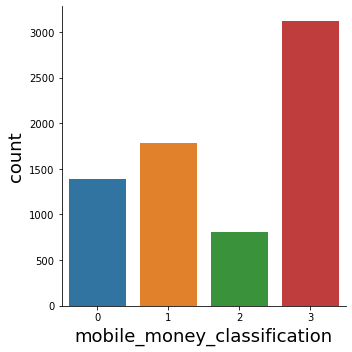

In [116]:
# Explore Target distribution 

sns.catplot(x="mobile_money_classification", kind="count", data= data)

##### Where;

0 - no mobile money and no other financial service (saving, borrowing, insurance)

1 - no mobile money, but at least one other financial service

2 - mobile money only

3  - mobile money and at least one other financial service


Text(0.5, 6.79999999999999, 'Gender')

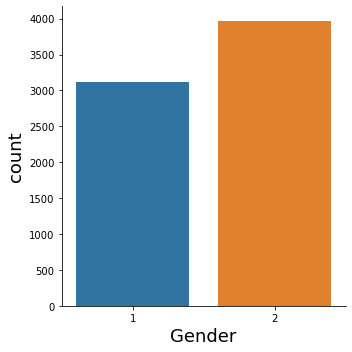

In [117]:




# Explore Q2 distribution 

sns.catplot(x="Q2", kind="count", data=data)
plt.xlabel('Gender')

##### Where;

1 - Male

2 - Female


Text(0.5, 6.79999999999999, 'Marital Status')

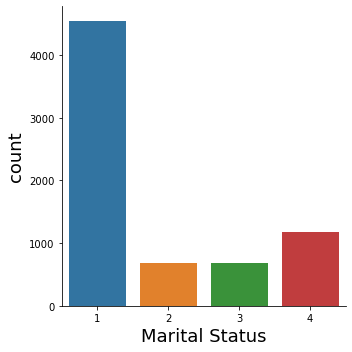

In [118]:
# Explore Q3 distribution 

sns.catplot(x="Q3", kind="count", data=data)
plt.xlabel('Marital Status')

##### Where;

1 - Married

2 - Divorced

3 - Widowed

4 - Single/never married



Text(0.5, 6.79999999999999, 'Highest level of education completed')

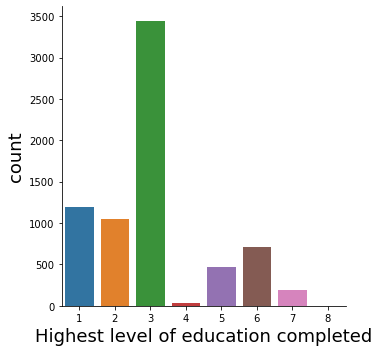

In [119]:
# Explore Q4 distribution 

sns.catplot(x="Q4", kind="count", data=data)
plt.xlabel('Highest level of education completed')

##### Where;

1 - No formal education

2 - Some primary

3 - Primary completed

4 - Post primary technical training

5 - Some secondary

6 - University or other higher education

7 - Don’t know


Text(0.5, 6.79999999999999, 'Land/Plot ownership')

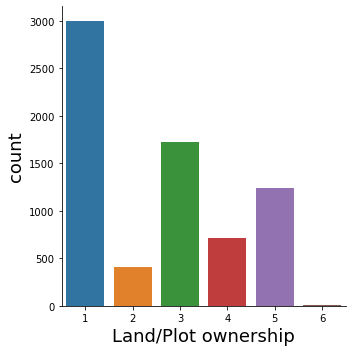

In [120]:
# Explore Q5 distribution 

sns.catplot(x="Q5", kind="count", data=data)
plt.xlabel('Land/Plot ownership')

##### Where;

1 - You personally own the land/plot where you live

2 - You own the land/plot together with someone else 

3 - A household member owns the land/plot 

4 - The land/plot is rented 

5 - You don’t own or rent the land 

6 - Don’t know


Text(0.5, 6.79999999999999, 'Other land ownership')

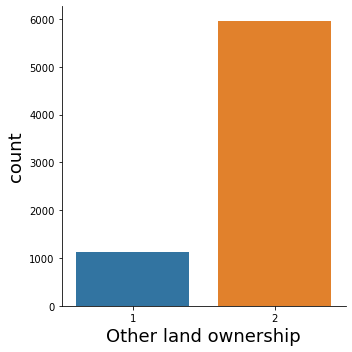

In [121]:
# Explore Q6 distribution 

sns.catplot(x="Q6", kind="count", data=data)
plt.xlabel('Other land ownership')

##### Where;

1 - Yes

2 - No


Text(0.5, 6.79999999999999, 'Mobile phone ownership')

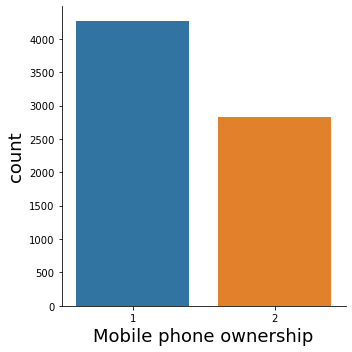

In [122]:
# Explore Q7 distribution 

sns.catplot(x="Q7", kind="count", data=data)
plt.xlabel('Mobile phone ownership')

##### Where;

1 - Yes

2 - No


#### Q8_1 through Q8_11;

People were asked how they got the money they spend.


Text(0.5, 6.79999999999999, 'Salaries/Wages')

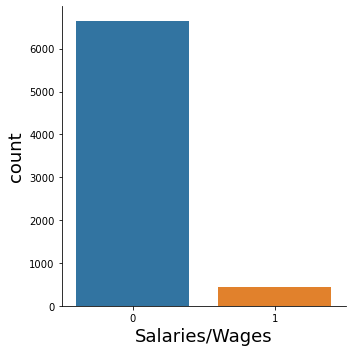

In [123]:
# Explore Q8_1 distribution 

sns.catplot(x="Q8_1", kind="count", data=data)
plt.xlabel('Salaries/Wages')

##### Where;

1 - Yes

0 - No


Text(0.5, 6.79999999999999, 'Trading/Selling')

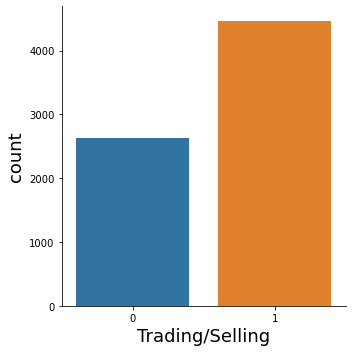

In [124]:
# Explore Q8_2 distribution 

sns.catplot(x="Q8_2", kind="count", data=data)
plt.xlabel('Trading/Selling')

##### Where;

1 - Yes

0 - No

Text(0.5, 6.79999999999999, 'Service Provision')

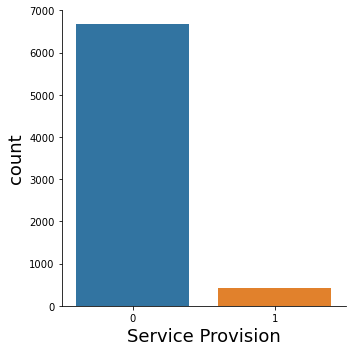

In [125]:
# Explore Q8_3 distribution 

sns.catplot(x="Q8_3", kind="count", data=data)
plt.xlabel('Service Provision')

##### Where;

1 - Yes

0 - No

Text(0.5, 6.79999999999999, 'Piece work/Casual labor/Occasional jobs')

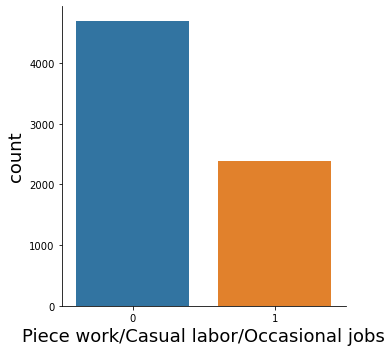

In [126]:
# Explore Q8_4 distribution 

sns.catplot(x="Q8_4", kind="count", data=data)
plt.xlabel('Piece work/Casual labor/Occasional jobs')

##### Where;

1 - Yes

0 - No

Text(0.5, 6.79999999999999, 'Rental Income')

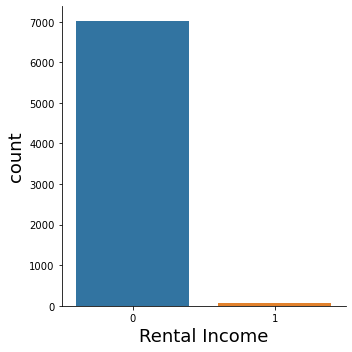

In [127]:
# Explore Q8_5 distribution 

sns.catplot(x="Q8_5", kind="count", data=data)
plt.xlabel('Rental Income')

##### Where;

1 - Yes

0 - No

Text(0.5, 6.79999999999999, 'Interest from savings, investments, stocks, unit trusts etc.')

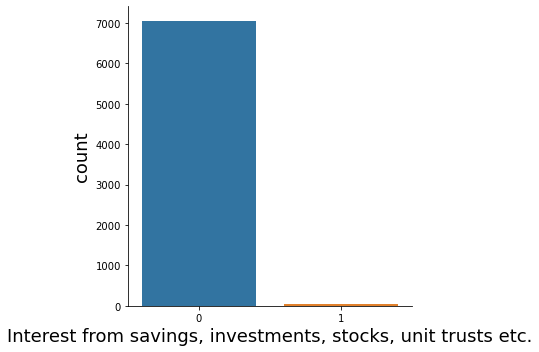

In [128]:
# Explore Q8_6 distribution 

sns.catplot(x="Q8_6", kind="count", data=data)
plt.xlabel('Interest from savings, investments, stocks, unit trusts etc.')

##### Where;

1 - Yes

0 - No

Text(0.5, 6.79999999999999, 'Pension')

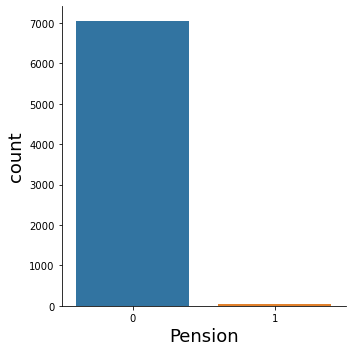

In [129]:
# Explore Q8_7 distribution 

sns.catplot(x="Q8_7", kind="count", data=data)
plt.xlabel('Pension')

##### Where;

1 - Yes

0 - No

Text(0.5, 6.79999999999999, 'Social welfare money/grant from Government')

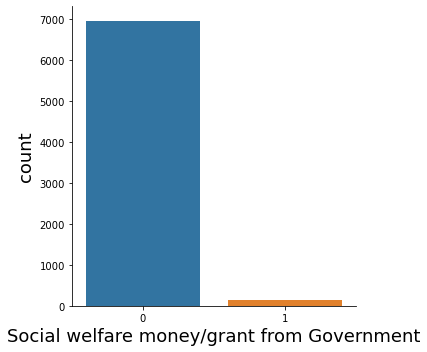

In [130]:
# Explore Q8_8 distribution 

sns.catplot(x="Q8_8", kind="count", data=data)
plt.xlabel('Social welfare money/grant from Government')

##### Where;

1 - Yes

0 - No

Text(0.5, 6.79999999999999, 'Someone else/Others')

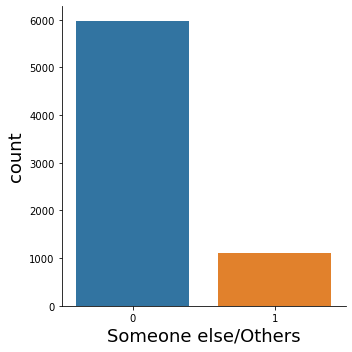

In [131]:
# Explore Q8_9 distribution 

sns.catplot(x="Q8_9", kind="count", data=data)
plt.xlabel('Someone else/Others')

##### Where;

1 - Yes

0 - No

Text(0.5, 6.79999999999999, 'Does Not Spend')

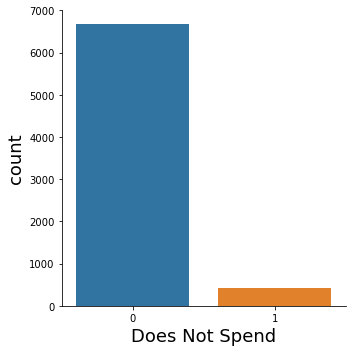

In [132]:
# Explore Q8_10 distribution 

sns.catplot(x="Q8_10", kind="count", data=data)
plt.xlabel('Does Not Spend')

##### Where;

1 - Yes

0 - No

Text(0.5, 6.79999999999999, 'Other')

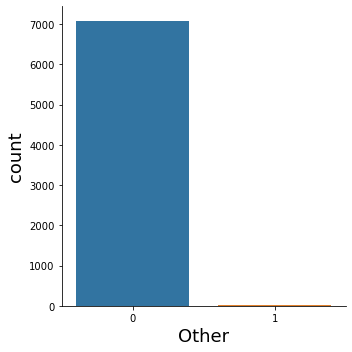

In [133]:
# Explore Q8_11 distribution 

sns.catplot(x="Q8_11", kind="count", data=data)
plt.xlabel('Other')

##### Where;

1 - Yes

0 - No

#### Q9;

Only for those who said they get money through salary/wages.



Text(0.5, 6.79999999999999, 'Who do you work for?')

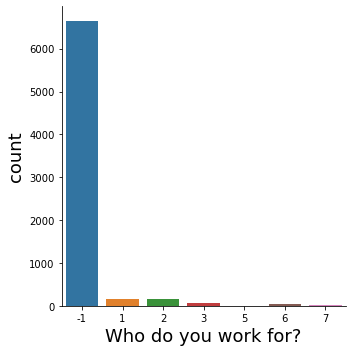

In [134]:
# Explore Q9 distribution 

sns.catplot(x="Q9", kind="count", data=data)
plt.xlabel('Who do you work for?')

##### Where;

-1 - not applicable

1 - Government

2 - Private company/business

3 - Individual who owns his own business

4 - Small scale farmer

5 - Commercial farmer

6 - Work for individual/household e.g. security guard, maid etc. 

7 - Other


#### Q10;

Only for those who said they get money from selling things.

Text(0.5, 6.79999999999999, 'Things MAINLY sold')

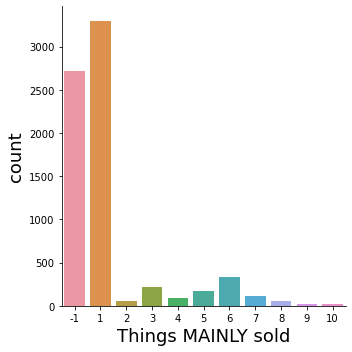

In [135]:
# Explore Q10 distribution 

sns.catplot(x="Q10", kind="count", data=data)
plt.xlabel('Things MAINLY sold')

##### Where;
-1 - not applicable

1 - Crops/produce I grow

2 - Products I get from livestock

3 - Livestock 

4 - Fish you catch yourself/aquaculture 

5 - Things you buy from others – agricultural products

6 - Things you buy from others – non-agricultural products

7 - Things you make (clothes, art, crafts)

8 - Things you collect from nature (stones, sand, thatch, herbs)

9 - Things you process (honey, dairy products, flour)

10 - Other


#### Q11;

Only for those who said they get money from providing a service 

Text(0.5, 6.79999999999999, 'Services MAINLY provided')

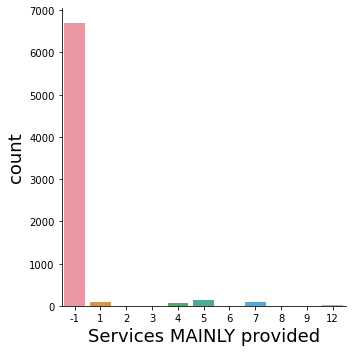

In [136]:
# Explore Q11 distribution 

sns.catplot(x="Q11", kind="count", data=data)
plt.xlabel('Services MAINLY provided')

##### Where;
-1 - not applicable

1 - Personal services (hairdressers, massage, etc.) 

2 - Telecommunications/IT

3 - Financial services 

4 - Transport

5 - Hospitality – Accommodation, restaurants, etc. 

6 - Information/research

7 - Technical – mechanic, etc.

8 - Educational/child care

9 - Health services – traditional healer etc.

10 - Legal services 

11 - Security 

12 - Other, specify


Text(0.5, 6.79999999999999, 'If money was sent in the past 12 months')

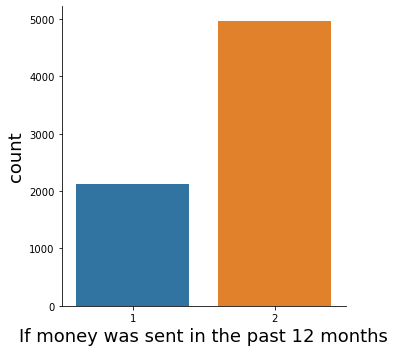

In [137]:
# Explore Q12 distribution 

sns.catplot(x="Q12", kind="count", data=data)
plt.xlabel('If money was sent in the past 12 months')

##### Where;

1 Yes

2 No


Text(0.5, 6.79999999999999, 'When money was last sent')

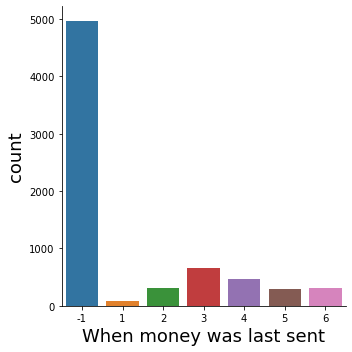

In [138]:
# Explore Q13 distribution 

sns.catplot(x="Q13", kind="count", data=data)
plt.xlabel('When money was last sent')

##### Where;

-1 - not applicable

1 - Yesterday/today 

2 - In the past 7 days

3 - In the past 30 days 

4 - In the past 90 days

5 - More than 90 days ago but less than 6 months ago  

6 - 6 months or longer ago


Text(0.5, 6.79999999999999, 'If money was received in the past 12 months from a different place within or outside the country')

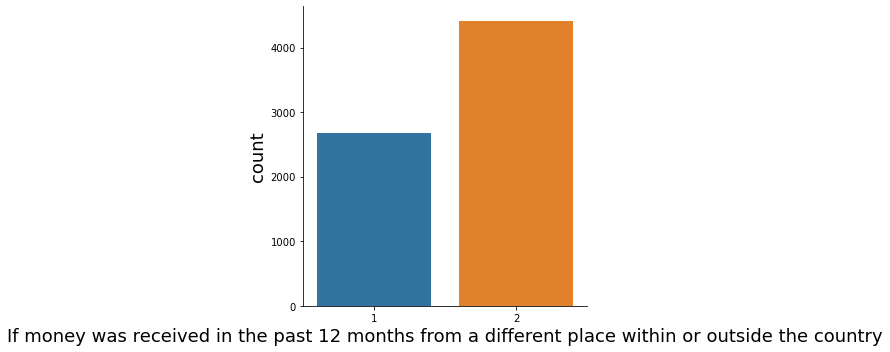

In [139]:
# Explore Q14 distribution 

sns.catplot(x="Q14", kind="count", data=data)
plt.xlabel('If money was received in the past 12 months from a different place within or outside the country')

##### Where;

1 Yes

2 No


Text(0.5, 6.79999999999999, 'When they last received money')

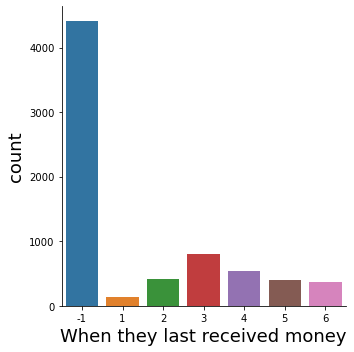

In [140]:
# Explore Q15 distribution 

sns.catplot(x="Q15", kind="count", data=data)
plt.xlabel('When they last received money')

#### Where;

-1 - not applicable

1 - Yesterday/today 

2 - In the past 7 days

3 - In the past 30 days

4 - In the past 90 days

5 - More than 90 days ago but less than 6 months ago  

6 - 6 months or longer ago


Text(0.5, 6.79999999999999, 'How often in the past 12 months, mobile money was used for purchases of goods and/or services')

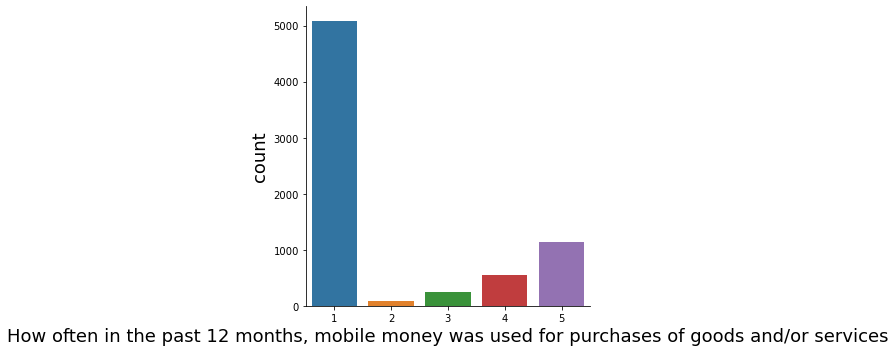

In [141]:
# Explore Q16 distribution 

sns.catplot(x="Q16", kind="count", data=data)
plt.xlabel('How often in the past 12 months, mobile money was used for purchases of goods and/or services')

##### Where;
-1 - not applicable

1 - Never

2 - Daily 

3 - Weekly 

4 - Monthly 

5 - Less often than monthly


Text(0.5, 6.79999999999999, 'How often mobile money was used for paying bills in the last 12 months')

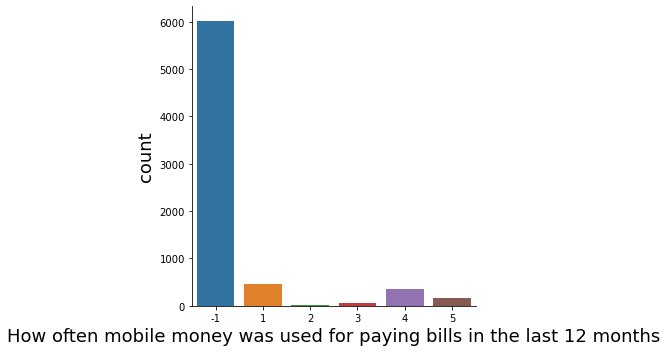

In [142]:
# Explore Q17 distribution 

sns.catplot(x="Q17", kind="count", data=data)
plt.xlabel('How often mobile money was used for paying bills in the last 12 months')

##### Where;

-1 - not applicable

1 - Never

2 - Daily 

3 - Weekly

4 - Monthly 

5 - Less often than monthly


Text(0.5, 6.79999999999999, 'Literacy in Kiswahili')

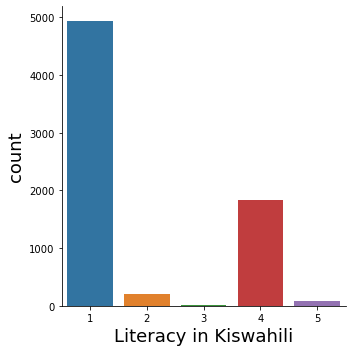

In [143]:
# Explore Q18 distribution 

sns.catplot(x="Q18", kind="count", data=data)
plt.xlabel('Literacy in Kiswahili')

##### Where;
1 - Can read and write  
2 - Can read only  
3 - Can write only  
4 - Can neither read nor write  
5 - Refused to read


Text(0.5, 6.79999999999999, 'Literacy in English')

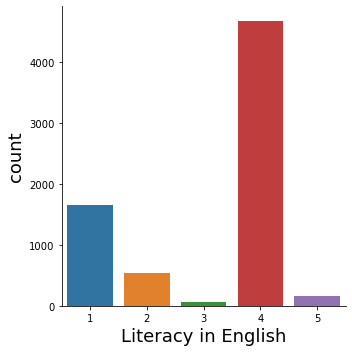

In [144]:
# Explore Q19 distribution 

sns.catplot(x="Q19", kind="count", data=data)
plt.xlabel('Literacy in English')

##### Where;

1 - Can read and write  
2 - Can read only  
3 - Can write only  
4 - Can neither read nor write  
5 - Refused to read


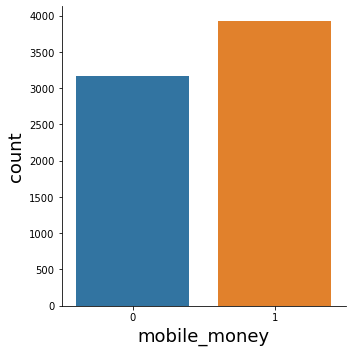

In [145]:
# Explore mobile_money distribution 

sns.catplot(x="mobile_money", kind="count", data=data)

##### Where;

1 - Yes

0 - No


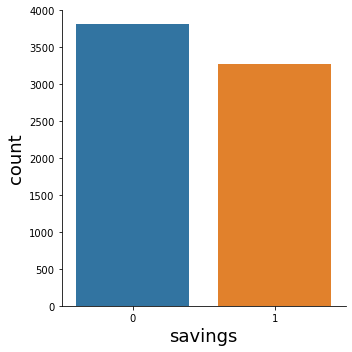

In [146]:
# Explore Savings distribution 

sns.catplot(x="savings", kind="count", data=data)

##### Where;

1 - Yes

0 - No


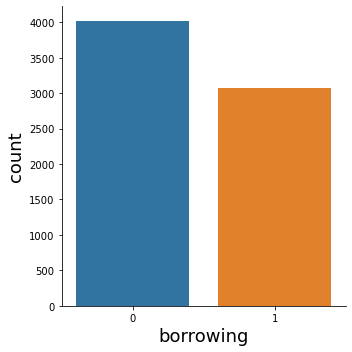

In [147]:
# Explore Borrowing distribution 

sns.catplot(x="borrowing", kind="count", data=data)

##### Where;

1 - Yes

0 - No


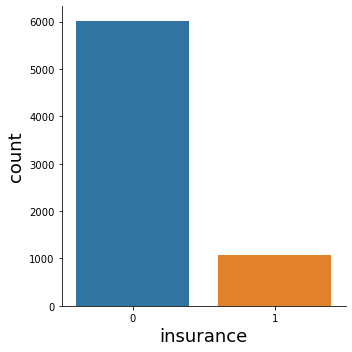

In [148]:
# Explore Insurance distribution 

sns.catplot(x="insurance", kind="count", data=data)

##### Where;

1 - Yes

0 - No


Text(0.5, 0, 'Age')

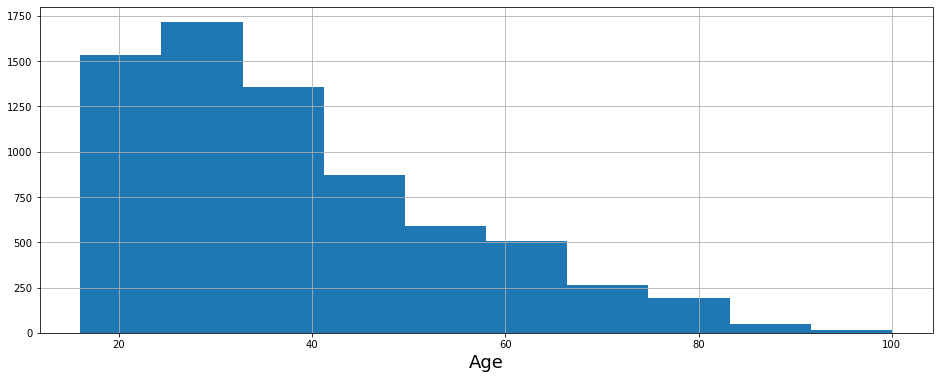

In [149]:
# Explore Q1 distribution 
plt.figure(figsize=(16, 6))
data.Q1.hist() 
plt.xlabel('Age')

Text(0.5, 0, 'Longitude')

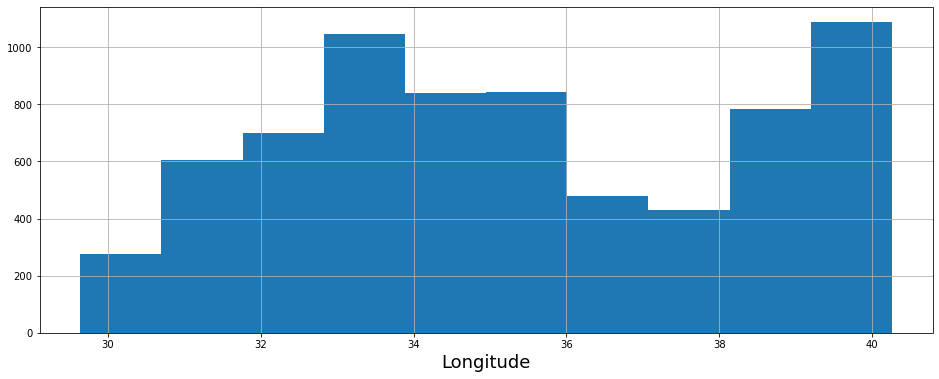

In [150]:
# Explore Longitude distribution 
plt.figure(figsize=(16, 6))
data.Longitude.hist() 
plt.xlabel('Longitude')

Text(0.5, 0, 'Latitude')

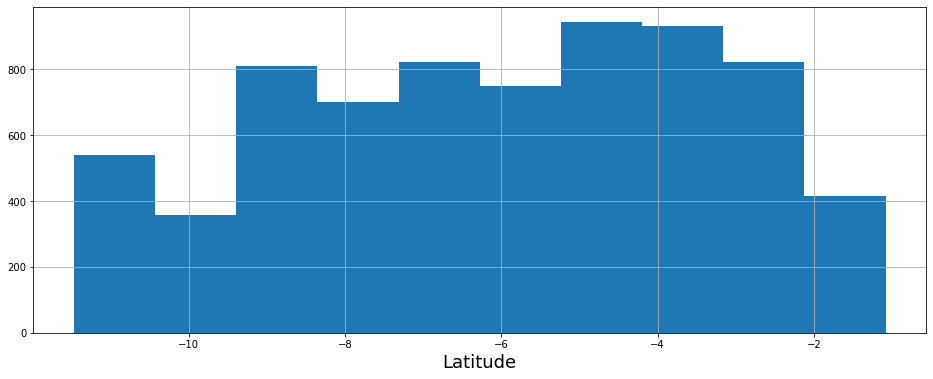

In [151]:
# Explore Latitude distribution 
plt.figure(figsize=(16, 6))
data.Latitude.hist() 
plt.xlabel('Latitude')

#### Bivariate Analysis

Text(0.5, 0, 'Gender')

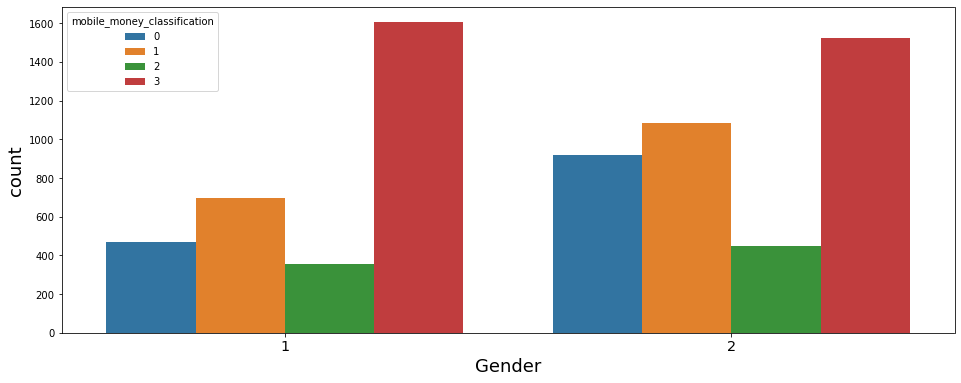

In [152]:
#Explore Q2  vs  mobile_money_classification

plt.figure(figsize=(16, 6))
sns.countplot('Q2', hue= 'mobile_money_classification', data=data)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)
plt.xlabel('Gender')

##### Where;
1 - Male

2 - Female
##### And;

0 - no mobile money and no other financial service (saving, borrowing, insurance)

1 - no mobile money, but at least one other financial service

2 - mobile money only

3 - mobile money and at least one other financial service



Text(0.5, 0, 'Marital Status')

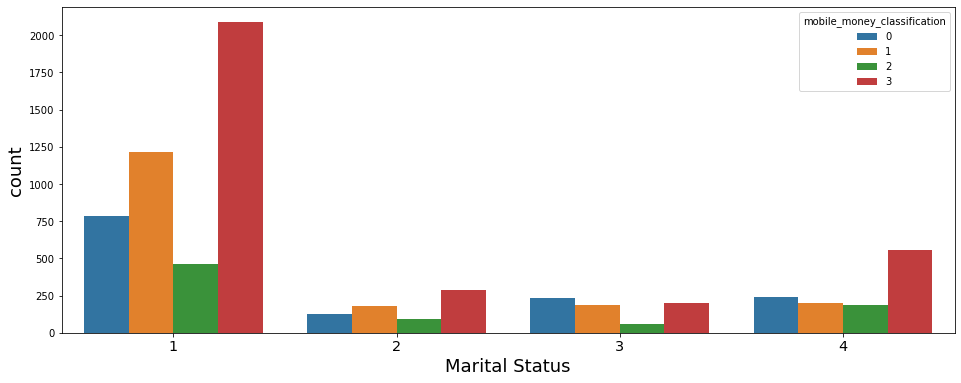

In [153]:
#Explore Q3  vs  mobile_money_classification

plt.figure(figsize=(16, 6))
sns.countplot('Q3', hue= 'mobile_money_classification', data=data)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)
plt.xlabel('Marital Status')

##### Where;
1 - Married

2 - Divorced

3 - Widowed

4 - Single/never married
##### And;
0 - no mobile money and no other financial service (saving, borrowing, insurance)

1 - no mobile money, but at least one other financial service

2 - mobile money only

3 - mobile money and at least one other financial service


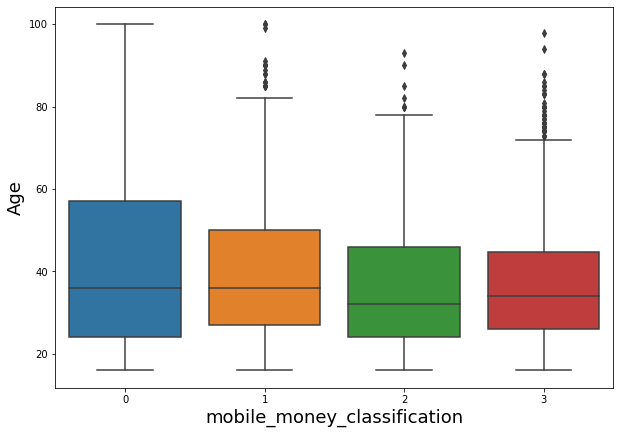

In [154]:
# Hypothesis 1
# People with age above 60 will not have both mobile money and other financial service.

plt.figure(figsize = (10,7))
sns.boxplot(x=data['mobile_money_classification'], y=data['Q1'], data=data)
plt.ylabel('Age')
plt.show()

##### Where;
0 - no mobile money and no other financial service (saving, borrowing, insurance)

1 - no mobile money, but at least one other financial service

2 - mobile money only

3 - mobile money and at least one other financial service


Text(0.5, 0, 'Highest Level of Education')

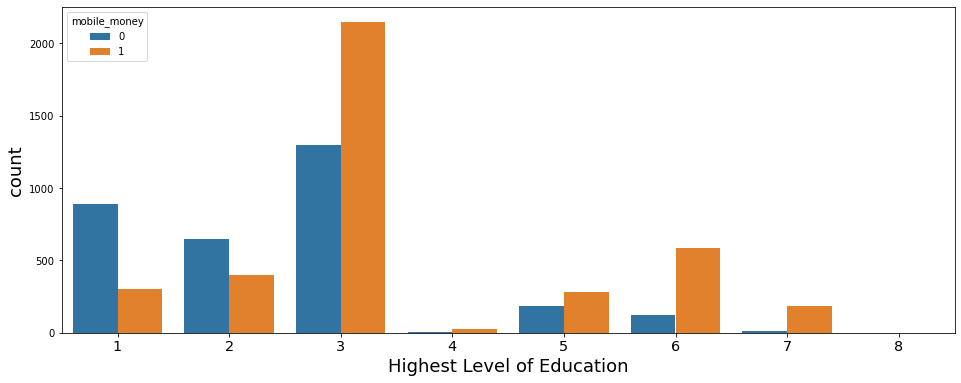

In [155]:
# Hypothesis 2
# People with lower education level are more likely to possess mobile money.
# Explore Q4  vs  mobile_money

plt.figure(figsize=(16, 6))
sns.countplot('Q4', hue= 'mobile_money', data=data)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)
plt.xlabel('Highest Level of Education')

##### Where;
1 - No formal education

2 - Some primary

3 - Primary completed

4 - Post primary technical training

5 - Some secondary

6 - University or other higher education

7 - Don’t know
##### And;
1 - Yes

0 - No


Text(0.5, 0, 'Mobile phone ownership')

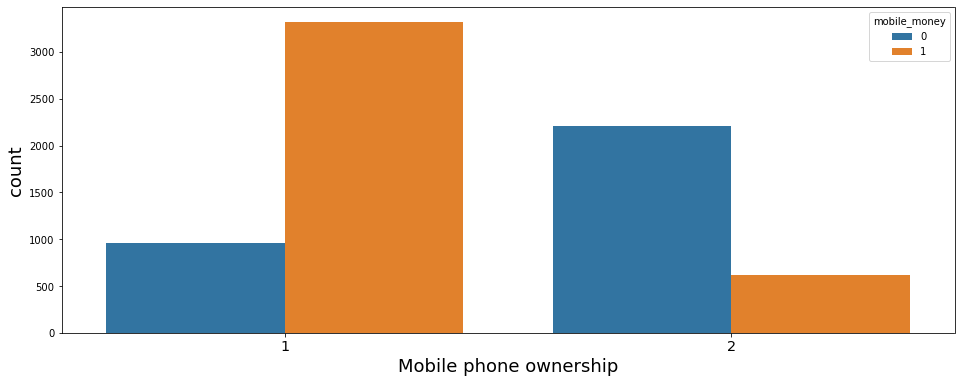

In [156]:
# Hypothesis 3
# People with no mobile phones are most likely to not use mobile money.
# Explore Q7  vs  mobile_money
plt.figure(figsize=(16, 6))
sns.countplot('Q7', hue= 'mobile_money', data=data)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)
plt.xlabel('Mobile phone ownership')

##### Where;
1 - Yes

2 - No
##### And;
1 - Yes

0 - No


Text(0.5, 0, 'Salaries/wages')

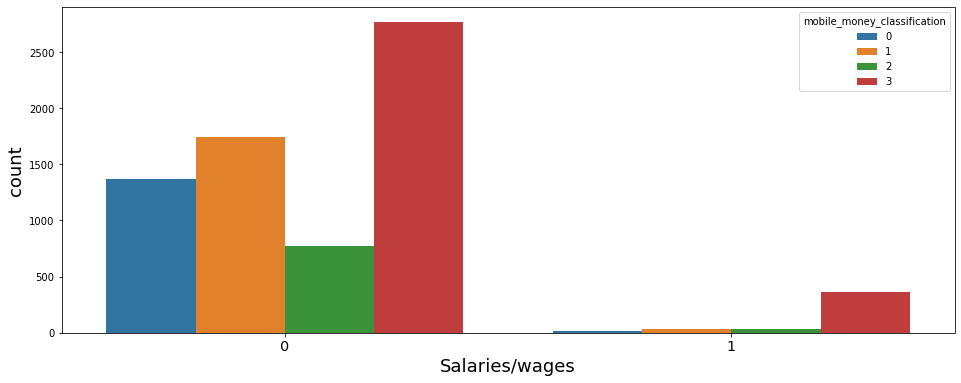

In [157]:
# Hypothesis 4
# Almost everyone who gets money through salaries/wages is less likely to use mobile money only.
# Explore Q8_1  vs  mobile_money_classification

plt.figure(figsize=(16, 6))
sns.countplot('Q8_1', hue= 'mobile_money_classification', data=data)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)
plt.xlabel('Salaries/wages')

##### Where;
1 - Yes
0 - No
##### And;
0 - no mobile money and no other financial service (saving, borrowing, insurance)

1 - no mobile money, but at least one other financial service

2 - mobile money only

3 - mobile money and at least one other financial service



Text(0.5, 0, 'Who do you work for?')

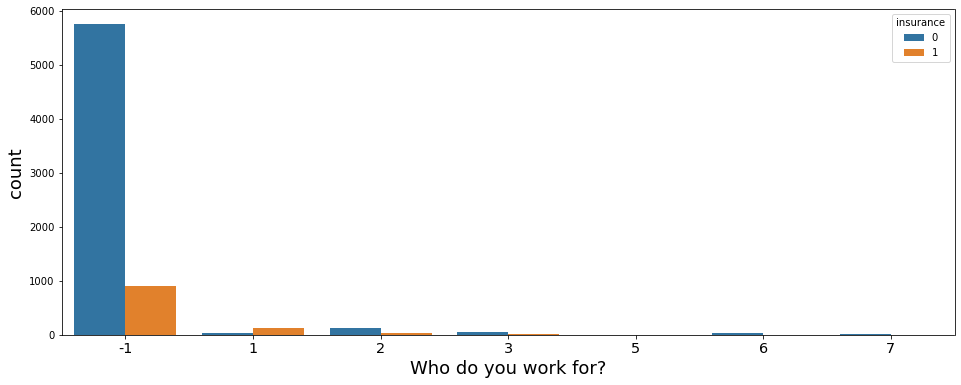

In [158]:
# Hypothesis 5
# Almost everyone who works for government has insurance.
# Explore Q9  vs  insurance

plt.figure(figsize=(16, 6))
sns.countplot('Q9', hue= 'insurance', data=data)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)
plt.xlabel('Who do you work for?')

##### Where;
-1 - not applicable

1 - Government

2 - Private company/business

3 - Individual who owns his own business

4 - Small scale farmer

5 - Commercial farmer 

6 - Work for individual/household e.g. security guard, maid etc. 

7 - Other
##### And;
1 - Yes

0 - No


### Hypothesis Results
1.People with age above 60 will not have both mobile money and other financial service - TRUE

2.People with lower education level are more likely to possess mobile money - TRUE

3.People with no mobile phones are most likely to not use mobile money - TRUE

4.Almost everyone who gets money through salaries/wages is less likely to use mobile money only - TRUE

5.Almost everyone who works for government has insurance - TRUE